In [1]:
import xgboost as xgb
import Preprocess as util
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Loading and Spliting Data into Train and Test

In [2]:
input_data, labels = util.load_data()
print('Input Data Shape = {}'.format(input_data.shape))
print('Labels Shape = {}'.format(labels.shape))

train_x, test_x, train_y, test_y = train_test_split(input_data, labels, test_size = 0.20, random_state = 42)
print('Training input data shape = {}'.format(train_x.shape))
print('Training labels shape = {}'.format(train_y.shape))
print('Testing input data shape = {}'.format(test_x.shape))
print('Testing labels shape = {}'.format(test_y.shape))

Input Data Shape = (41188, 19)
Labels Shape = (41188, 1)
Training input data shape = (32950, 19)
Training labels shape = (32950, 1)
Testing input data shape = (8238, 19)
Testing labels shape = (8238, 1)


# Loading Data into XGBoost Interface

In [3]:
dtrain = xgb.DMatrix(train_x, label = train_y)
dtest = xgb.DMatrix(test_x, label = test_y)

# Setting Parameters

In [4]:
param = {'booster': 'gbtree', 
         'max_depth': 6, 
         'eta': 1, 
         'objective': 'binary:logistic', 
         'nthread': 4,
         'eval_metric':'error',
         'n_estimators': 200}

# Training the model

In [5]:
model = xgb.XGBModel(**param)
model_details = model.fit(train_x,train_y,eval_set=[(train_x,train_y)],verbose=True)
evals_result = model.evals_result()
print('\nTraining Accuracy: {}%'.format((1 - float(evals_result['validation_0']['error'][199]))*100))

[0]	validation_0-error:0.080486
[1]	validation_0-error:0.078998
[2]	validation_0-error:0.078634
[3]	validation_0-error:0.077633
[4]	validation_0-error:0.077451
[5]	validation_0-error:0.077147
[6]	validation_0-error:0.07742
[7]	validation_0-error:0.077117
[8]	validation_0-error:0.076965
[9]	validation_0-error:0.076844
[10]	validation_0-error:0.076449
[11]	validation_0-error:0.07654
[12]	validation_0-error:0.076328
[13]	validation_0-error:0.07569
[14]	validation_0-error:0.075387
[15]	validation_0-error:0.07481
[16]	validation_0-error:0.074598
[17]	validation_0-error:0.074294
[18]	validation_0-error:0.073961
[19]	validation_0-error:0.073839
[20]	validation_0-error:0.073778
[21]	validation_0-error:0.073627
[22]	validation_0-error:0.073687
[23]	validation_0-error:0.073536
[24]	validation_0-error:0.073202
[25]	validation_0-error:0.07305
[26]	validation_0-error:0.073232
[27]	validation_0-error:0.072898
[28]	validation_0-error:0.072959
[29]	validation_0-error:0.073202
[30]	validation_0-error:0

# Testing Model on Unseen Data

In [6]:
y_pred = model.predict(test_x)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(test_y, predictions)
print('Accuracy: {}%'.format(accuracy * 100.0))

Accuracy: 91.55134741442097%


# Analysing the Model

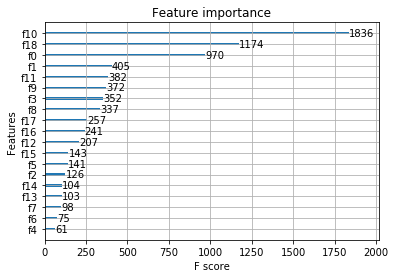

In [7]:
xgb.plot_importance(model)